# MatplotLib

In [49]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.ticker as mtick
import matplotlib.dates as mdate
from datetime import datetime, timedelta
import yfinance as yf
from bcb import sgs
import mplcyberpunk

plt.style.reload_library()

In [40]:
df_lucros = pd.DataFrame({
    'Weg': [2000, 3000, 5000, 6000],
    'Petro': [150, 5000, 2000, 10000]
},
    index = ['1T', '2T', '3T', '4T'])
df_lucros

,Weg,Petro
1T,2000,150
2T,3000,5000
3T,5000,2000
4T,6000,10000


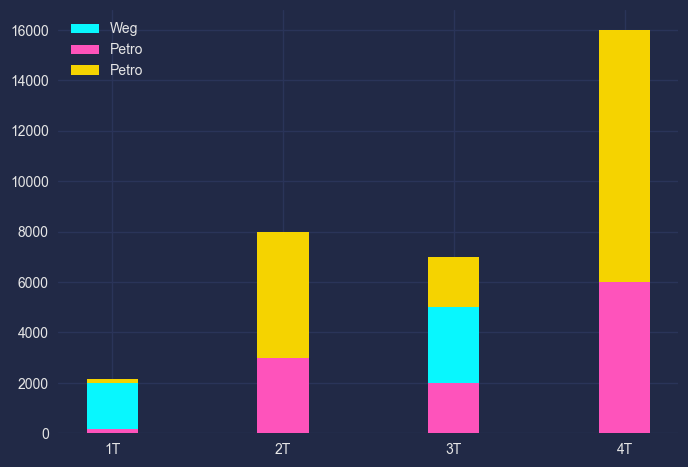

In [50]:
fig, ax = plt.subplots()

ax.bar(df_lucros.index, df_lucros.Weg.values, label = 'Weg', width = 0.3, align= 'center')

#sobrepostos
ax.bar(df_lucros.index, df_lucros.Petro.values, label = 'Petro', width = 0.3, align= 'center')

#Entra acima
ax.bar(df_lucros.index, df_lucros.Petro.values, label = 'Petro', width = 0.3, bottom=df_lucros.Weg.values)

ax.legend()

[Text(0, 0, '150'),
 Text(0, 0, '5000'),
 Text(0, 0, '2000'),
 Text(0, 0, '10000')]

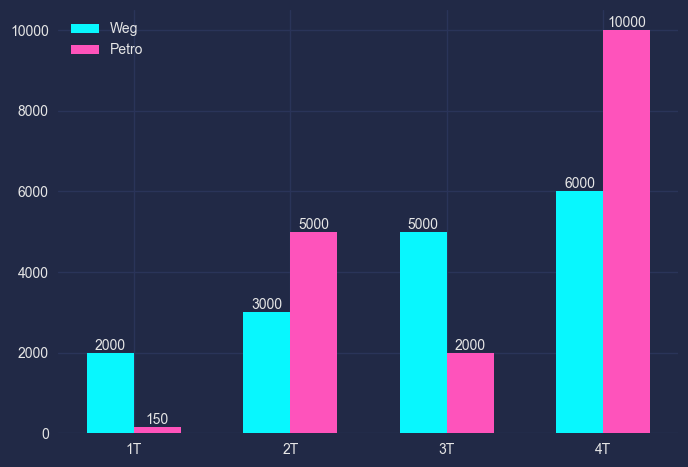

In [42]:
#resolvendo stack

fig, ax = plt.subplots()

numero_de_trimestres = 4
posicao_barras = np.arange(numero_de_trimestres) #cria uma lista do 0 ao 3 - 4 elementos
largura_barras = 0.3

bar1 = ax.bar(posicao_barras, df_lucros.Weg.values, label = 'Weg', width=largura_barras)
bar2 = ax.bar(posicao_barras + largura_barras, df_lucros.Petro.values, label = 'Petro', width=largura_barras)
plt.xticks(posicao_barras + largura_barras /2, tuple(df_lucros.index))

ax.legend()

#adicionando legenda de numeros
ax.bar_label(bar1)
ax.bar_label(bar2)

In [43]:
# buscando serie do ipca e igp-m

inflacao = sgs.get({'ipca': 433, 'igp-m': 189}, start = datetime.now() - timedelta(days = 180))
inflacao

,ipca,igp-m
Date,,
2023-04-01,0.61,-0.95
2023-05-01,0.23,-1.84
2023-06-01,-0.08,-1.93
2023-07-01,0.12,-0.72
2023-08-01,0.23,-0.14
2023-09-01,0.26,0.37


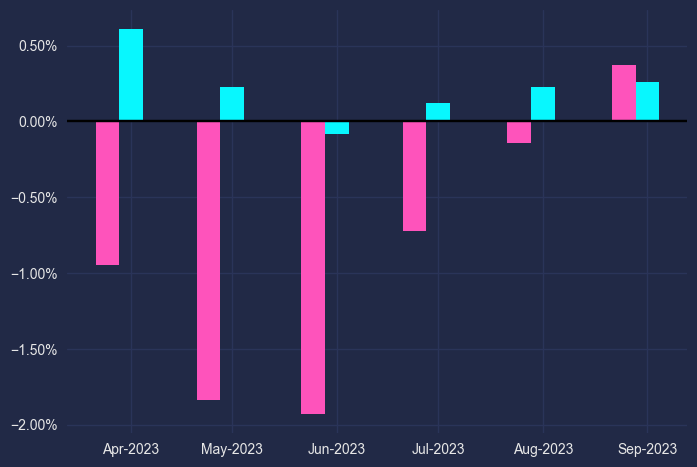

In [44]:
#convertendo datas por numeros para contas no eixo x
datas_numericas = mdate.date2num(inflacao.index)

fig, ax = plt.subplots()

ax.bar(datas_numericas, inflacao['ipca'].values, label = 'IPCA', width= 7)
ax.bar(datas_numericas - 7, inflacao['igp-m'].values, label = 'IGP-M', width= 7)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
myFmt = mdate.DateFormatter('%b-%Y')
ax.xaxis.set_major_formatter(myFmt)
ax.xaxis_date()

ax.axhline(y = 0, color = 'black')

In [95]:
# retorno acum ambev e bvsp 3anos 5anos 10anos

cotacoes = yf.download(['ABEV3.SA', '^BVSP'],  '2010-01-01', '2023-01-01')['Adj Close']

[*********************100%%**********************]  2 of 2 completed


In [96]:
def calc_retorno_acum(df):
    df_retorno_diario = df.pct_change().dropna()
    df_retorno_acum = (df_retorno_diario + 1).cumprod() - 1
    return df_retorno_acum

cotacoes_3_anos = cotacoes[cotacoes.index.year >= 2020]
cotacoes_5_anos = cotacoes[cotacoes.index.year >= 2018]
cotacoes_10_anos = cotacoes[cotacoes.index.year >= 2013]

retornos_acumulados_3_anos = calc_retorno_acum(cotacoes_3_anos).iloc[-1]
retornos_acumulados_5_anos = calc_retorno_acum(cotacoes_5_anos).iloc[-1]
retornos_acumulados_10_anos = calc_retorno_acum(cotacoes_10_anos).iloc[-1]


retornos_acumulados_3_anos

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_20440\4207147235.py:2: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Call ffill before calling pct_change to retain current behavior and silence this warning.
  df_retorno_diario = df.pct_change().dropna()


ABEV3.SA   -0.146917
^BVSP      -0.072040
Name: 2022-12-29 00:00:00, dtype: float64

Text(0.5, 1.0, 'Retorno acumulado 10 anos')

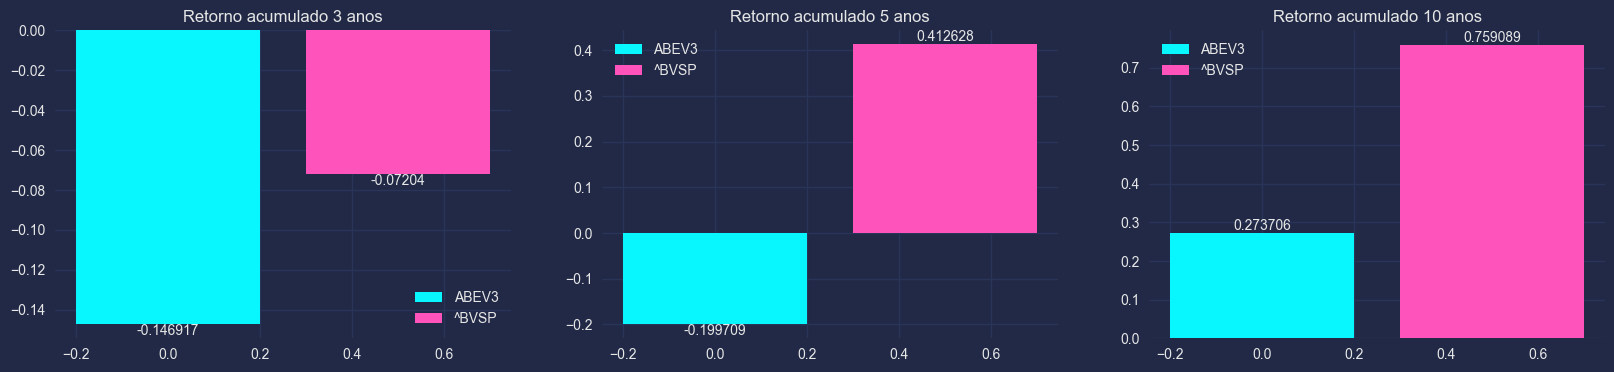

In [97]:
fig, ax = plt.subplots(1, 3, figsize = (20, 4))


bar1 = ax[0].bar(0, retornos_acumulados_3_anos['ABEV3.SA'], width=0.4, label= 'ABEV3')
bar2 = ax[0].bar(.5, retornos_acumulados_3_anos['^BVSP'], width=0.4, label= '^BVSP')
ax[0].legend()
ax[0].bar_label(bar1)
ax[0].bar_label(bar2)
ax[0].set_title('Retorno acumulado 3 anos')

bar1 = ax[1].bar(0, retornos_acumulados_5_anos['ABEV3.SA'], width=0.4, label= 'ABEV3')
bar2 = ax[1].bar(.5, retornos_acumulados_5_anos['^BVSP'], width=0.4, label= '^BVSP')
ax[1].legend()
ax[1].bar_label(bar1)
ax[1].bar_label(bar2)
ax[1].set_title('Retorno acumulado 5 anos')

bar1 = ax[2].bar(0, retornos_acumulados_10_anos['ABEV3.SA'], width=0.4, label= 'ABEV3')
bar2 = ax[2].bar(.5, retornos_acumulados_10_anos['^BVSP'], width=0.4, label= '^BVSP')
ax[2].legend()
ax[2].bar_label(bar1)
ax[2].bar_label(bar2)
ax[2].set_title('Retorno acumulado 10 anos')


In [116]:
#forma gabarito
cotacoes = yf.download(['^BVSP', 'ABEV3.SA'], '2010-01-01', '2022-11-10')['Adj Close']

retorno_1_ano = (cotacoes.pct_change(periods= 252).dropna()).iloc[-1, :]
retorno_3_anos = (cotacoes.pct_change(periods= 252 * 3).dropna()).iloc[-1, :]
retorno_5_anos = (cotacoes.pct_change(periods= 252 * 5).dropna()).iloc[-1, :]
retorno_10_anos = (cotacoes.pct_change(periods= 252 * 10).dropna()).iloc[-1, :]

print(retorno_1_ano)

valores_abev = np.array([retorno_1_ano.iloc[0], retorno_3_anos.iloc[0], retorno_5_anos.iloc[0], retorno_10_anos.iloc[0]])
valores_ibov = np.array([retorno_1_ano.iloc[1], retorno_3_anos.iloc[1], retorno_5_anos.iloc[1], retorno_10_anos.iloc[1]])

[*********************100%%**********************]  2 of 2 completed
ABEV3.SA   -0.043399
^BVSP       0.083530
Name: 2022-11-09 00:00:00, dtype: float64


C:\Users\Gabriel\AppData\Local\Temp\ipykernel_20440\2237597948.py:4: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Call ffill before calling pct_change to retain current behavior and silence this warning.
  retorno_1_ano = (cotacoes.pct_change(periods= 252).dropna()).iloc[-1, :]
C:\Users\Gabriel\AppData\Local\Temp\ipykernel_20440\2237597948.py:5: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Call ffill before calling pct_change to retain current behavior and silence this warning.
  retorno_3_anos = (cotacoes.pct_change(periods= 252 * 3).dropna()).iloc[-1, :]
C:\Users\Gabriel\AppData\Local\Temp\ipykernel_20440\2237597948.py:6: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Call ffill before calling pct_change to retain current behavior and silence this warni

Text(0.5, 1.0, 'Performance acumulada Ibov x ABEV3')

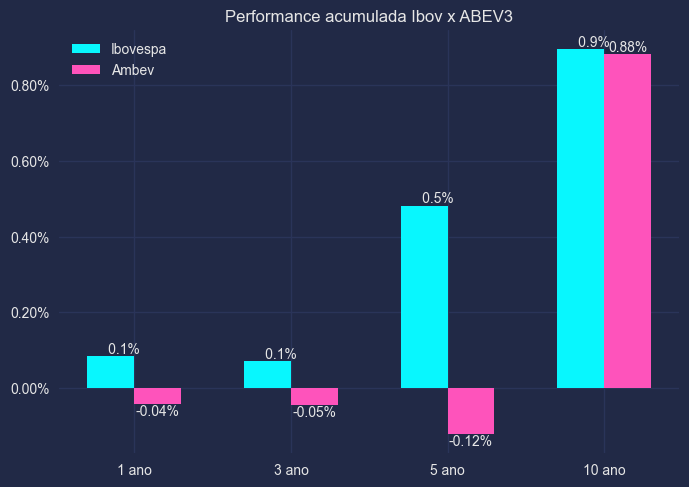

In [145]:
fig, ax = plt.subplots()

numero_de_anos = 4
posicao_barras = np.arange(numero_de_anos)
largura_barras = 0.3

barras = ax.bar(posicao_barras, valores_ibov, label = 'Ibovespa', width = largura_barras)
barras2 = ax.bar(posicao_barras + largura_barras, valores_abev, label = 'Ambev', width = largura_barras)
plt.xticks(posicao_barras + largura_barras / 2, ('1 ano', '3 ano', '5 ano', '10 ano',))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())


#adicionando legenda de números

ax.bar_label(barras, fmt = '%10.1f%%')
ax.bar_label(barras2, fmt = '%1.2f%%')

plt.legend()
plt.title('Performance acumulada Ibov x ABEV3')

